## Data Source 
### Kaggle : https://www.kaggle.com/c/instacart-market-basket-analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
plt.style.use('ggplot')
# set style of plots
# pd.set_option('max_columns', 200) # set max columns visible to 200
import glob 
# retrieve filenames matching a specified pattern like '.csv'

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import os 
os.getcwd()

'/Users/shiv/Desktop/Portfolio Project/Instacart_Customer_Analysis'

## Importing muptiple files at once

In [3]:
# Importing all csv files in path together using glob()

# Use glob python package to retrieve files/pathnames matching a specified pattern i.e. ‘.csv’
# Loop over the list of csv files, read that file using pandas.read_csv().
# Convert each csv file into a dataframe.
# Display its location, name, and content.

#Getting all csv files in folder
os.chdir(r'/Users/shiv/Desktop/Portfolio Project/Instacart_Customer_Analysis/instacart-market-basket-analysis/CSV/')
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [4]:
type(csv_files[0])

str

In [5]:
# all imported filenames 
i = 1
for f in csv_files :

    print("FileName ",i, ": ", f.split("/")[-1])
    i=i+1

FileName  1 :  products.csv
FileName  2 :  orders.csv
FileName  3 :  order_products__train.csv
FileName  4 :  departments.csv
FileName  5 :  aisles.csv
FileName  6 :  order_products__prior.csv
FileName  7 :  product_orders.csv
FileName  8 :  sample_submission.csv


In [6]:
# In Python, it is generally recommended to use a container type, 
# such as a list or a dictionary, 
# to store multiple variables with varying names. 

df_dict = {}

for f in csv_files:
    name = f.split("/")[-1].split(".")[0]
    df_dict[name] = pd.read_csv(f)
    
    print("File_name: ", name)
    print("Dataframe: ")
    print(df_dict[name].head())
    
df_dict['products'].head(4)

File_name:  products
Dataframe: 
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
File_name:  orders
Dataframe: 
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4  

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1


In [7]:
# However, if you really need to create variables with varying names dynamically in a loop,
# you can use the globals() function to achieve that. 
# Here's an example:

for f in csv_files: 
    name = f.split("/")[-1].split(".")[0]
    globals()[name] = pd.read_csv(f)
    
    print("FileName: ", name)
    print("DataFrame: ", name)

FileName:  products
DataFrame:  products
FileName:  orders
DataFrame:  orders
FileName:  order_products__train
DataFrame:  order_products__train
FileName:  departments
DataFrame:  departments
FileName:  aisles
DataFrame:  aisles
FileName:  order_products__prior
DataFrame:  order_products__prior
FileName:  product_orders
DataFrame:  product_orders
FileName:  sample_submission
DataFrame:  sample_submission


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
df_dict['products'].head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
df_dict.keys()

dict_keys(['products', 'orders', 'order_products__train', 'departments', 'aisles', 'order_products__prior', 'product_orders', 'sample_submission'])

In [83]:
# help(dict)

## Exploring the Dataframes

In [12]:
df_dict.keys()

dict_keys(['products', 'orders', 'order_products__train', 'departments', 'aisles', 'order_products__prior', 'product_orders', 'sample_submission'])

In [13]:
print(products.info())
print(products.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
(49688, 4)


In [14]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [15]:
products.isna().sum()
#Checking null values

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [16]:
products.loc[products.duplicated()]
#Checking duplicate Values

,product_id,product_name,aisle_id,department_id


In [17]:
for key in df_dict:
    print(key)
    print(df_dict[key].shape)
    display(df_dict[key].head())
    

products
(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


orders
(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


order_products__train
(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


departments
(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


aisles
(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


order_products__prior
(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


product_orders
(49677, 2)


,product_name,orders
0,#2 Coffee Filters,777
1,#2 Cone White Coffee Filters,13
2,#2 Mechanical Pencils,8
3,#4 Natural Brown Coffee Filters,241
4,& Go! Hazelnut Spread + Pretzel Sticks,164


sample_submission
(75000, 2)


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [18]:
df_dict.keys()

dict_keys(['products', 'orders', 'order_products__train', 'departments', 'aisles', 'order_products__prior', 'product_orders', 'sample_submission'])

### Data desctiption : https://www.kaggle.com/competitions/instacart-market-basket-analysis/data

In [19]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [20]:
orders['order_dow'].value_counts().sort_values()
# .sort_values(   'order_dow', ascending = True)

4    426339
3    436972
6    448761
5    453368
2    467260
1    587478
0    600905
Name: order_dow, dtype: int64

In [21]:
orders_all = pd.merge(order_products__prior, orders, on= 'order_id', how = 'left')

In [22]:
orders_all.shape

(32434489, 10)

In [23]:
order_products__prior.shape

(32434489, 4)

In [24]:
orders.shape

(3421083, 7)

In [25]:
orders_all.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [84]:
pd.set_option('display.max_rows', 1000)
orders_all.query(' user_id == 202279 ').head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [27]:
orders_all['eval_set'].value_counts()

prior    32434489
Name: eval_set, dtype: int64

In [28]:
merged_v1 = pd.merge(orders_all, products, on= "product_id", how = 'left')

In [29]:
merged_v2 = pd.merge(merged_v1, aisles, on = 'aisle_id', how = 'left')

In [30]:
merged_v3 = pd.merge(merged_v2, departments, on = 'department_id', how = 'left')

In [31]:
merged_v3.head(100)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
5,2,17794,6,1,202279,prior,3,5,9,8.0,Carrots,83,4,fresh vegetables,produce
6,2,40141,7,1,202279,prior,3,5,9,8.0,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry
7,2,1819,8,1,202279,prior,3,5,9,8.0,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry
8,2,43668,9,0,202279,prior,3,5,9,8.0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce
9,3,33754,1,1,205970,prior,16,5,17,12.0,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs


In [32]:
orders_final = merged_v3.copy()

In [85]:
# orders_final.loc[orders_final.duplicated(subset = 'user_id')].query(' user_id == 202279 ')

In [34]:
orders_final.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


## Useing SQLite 3 to import above dataframe in Database

In [35]:
import sqlite3

In [36]:
#Establish connection to your sqlite database
conn = sqlite3.connect('database.db')

# Store the dataframe in database 
orders_final.to_sql('orders', conn, if_exists = 'replace', index = False)

32434489

### Accessing database without using sql magic

In [37]:
query = "SELECT * from orders limit 10"
result = pd.read_sql_query(query, conn)
result.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


### Simplified database access using sql magic

In [38]:
#pip install ipython-sql
%load_ext sql

In [39]:
%sql sqlite:///database.db

In [40]:
%%sql 
select * from orders limit 10

 * sqlite:///database.db
Done.


order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
2,17794,6,1,202279,prior,3,5,9,8.0,Carrots,83,4,fresh vegetables,produce
2,40141,7,1,202279,prior,3,5,9,8.0,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry
2,1819,8,1,202279,prior,3,5,9,8.0,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry
2,43668,9,0,202279,prior,3,5,9,8.0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce
3,33754,1,1,205970,prior,16,5,17,12.0,Total 2% with Strawberry Lowfat Greek Strained Yogurt,120,16,yogurt,dairy eggs


# SQL Implementation

## Data Exploration and Analysis

#### *1. Total users, orders, products, departments, orders/useres*

In [41]:
%%sql 
select 
count(distinct user_id) as users, 
count(distinct order_id) as orders, 
count(distinct department) as deptartments, 
count(distinct product_id) as products, 
avg(days_since_prior_order) as avg_reordering_time, 
count(product_id)*1.00/count(distinct order_id) as avg_product_per_order

from orders

 * sqlite:///database.db
Done.


users,orders,deptartments,products,avg_reordering_time,avg_product_per_order
206209,3214874,21,49677,11.104074258292833,10.088883421247614


#### *2. What is the average orders per user for each department*

In [42]:
%%sql 

select department, 
round(count(distinct order_id)*1.00/count(distinct user_id),2) as order_per_user
from orders
group by 1 
order by 2 desc

 * sqlite:///database.db
Done.


department,order_per_user
produce,12.47
dairy eggs,11.43
beverages,8.43
snacks,7.99
frozen,7.24
pantry,6.47
bakery,6.27
deli,5.75
alcohol,5.36
babies,5.27


### *3. Average order per user for each product*

In [86]:
%%sql 

select 
product_name, 
count(distinct order_id)*1.00/count(distinct user_id) as order_per_users

from orders
group by 1 
order by 2 desc
limit 20

 * sqlite:///database.db
Done.


product_name,order_per_users
Raw Veggie Wrappers,17.0
Serenity Ultimate Extrema Overnight Pads,14.5
Orange Energy Shots,13.0
Chocolate Love Bar,12.625
Soy Powder Infant Formula,11.666666666666666
Simply Sleep Nighttime Sleep Aid,11.25
"Energy Shot, Grape Flavor",11.0
Sparking Water,10.0
Russian River Valley Reserve Pinot Noir,10.0
Maca Buttercups,10.0


In [44]:
# query = """
# select department, 
# round(count(distinct order_id)*1.00/count(distinct user_id),2) as order_per_user
# from orders
# group by 1 
# order by 2 desc

# """

# df1 = pd.read_sql_query(query, conn)

### *4. Department wise ranking and product wise ranking within the department*

In [87]:
%%sql 

select * from 
(select 
department, product_name, 
count(distinct order_id) as orders, 
rank() over(partition by department order by count(distinct order_id) desc) as product_ranking
-- rank() over(order by sum(count(distinct order_id) ) desc) as dept_ranking
from orders 
group by 1,2)a 
where product_ranking <= 5
limit 20

 * sqlite:///database.db
Done.


department,product_name,orders,product_ranking
alcohol,Sauvignon Blanc,8246,1
alcohol,Chardonnay,6153,2
alcohol,Cabernet Sauvignon,6115,3
alcohol,Beer,5844,4
alcohol,Vodka,5475,5
babies,Baby Food Stage 2 Blueberry Pear & Purple Carrot,8793,1
babies,Spinach Peas & Pear Stage 2 Baby Food,8035,2
babies,Gluten Free SpongeBob Spinach Littles,7083,3
babies,Broccoli & Apple Stage 2 Baby Food,6837,4
babies,Free & Clear Unscented Baby Wipes,6315,5


In [88]:
%%sql 
with base as (
select 
department, product_name, 
count(distinct order_id) as orders, 
rank() over(partition by department order by count(distinct order_id) desc) as product_rank
from orders 
group by 1,2
)
 
select * from 
(select 
department, product_name, 
orders,
product_rank, 
dense_rank() over(order by department_orders desc) as department_rank

from 
(select 
department, product_name, 
orders,
product_rank, 
sum(orders) over(partition by department) as department_orders

from base)a
order by department_rank, product_rank) a 
where 
-- department_rank <= 10 
-- and
product_rank <= 30
limit 20

 * sqlite:///database.db
Done.


department,product_name,orders,product_rank,department_rank
produce,Banana,472565,1,1
produce,Bag of Organic Bananas,379450,2,1
produce,Organic Strawberries,264683,3,1
produce,Organic Baby Spinach,241921,4,1
produce,Organic Hass Avocado,213584,5,1
produce,Organic Avocado,176815,6,1
produce,Large Lemon,152657,7,1
produce,Strawberries,142951,8,1
produce,Limes,140627,9,1
produce,Organic Raspberries,137057,10,1


### *5. Reordering pattern*

In [47]:
%%sql 

select 
days_since_prior_order, 
count(distinct order_id) as orders
from orders
group by 1 
order by 1 

 * sqlite:///database.db
Done.


days_since_prior_order,orders
None,206209
0.0,64436
1.0,141011
2.0,187723
3.0,210665
4.0,214488
5.0,206691
6.0,230245
7.0,306181
8.0,173259


### *6. Day of week vs Hour of Day*


In [48]:
%%sql 

select 
order_dow, order_hour_of_day, 
count(distinct order_id) as orders
from orders 
group by 1,2
order by 1,2

 * sqlite:///database.db
Done.


order_dow,order_hour_of_day,orders
0,0,3692
0,1,2235
0,2,1299
0,3,888
0,4,750
0,5,1076
0,6,3138
0,7,11530
0,8,26223
0,9,37990


### *7. Product Expoloration*

In [90]:
%%sql 

select 
product_name, 
count(distinct order_id) as orders, 
rank() over(order by count(distinct order_id) desc) as product_rank
from orders
group by 1
order by 2 desc
limit 10


 * sqlite:///database.db
Done.


product_name,orders,product_rank
Banana,472565,1
Bag of Organic Bananas,379450,2
Organic Strawberries,264683,3
Organic Baby Spinach,241921,4
Organic Hass Avocado,213584,5
Organic Avocado,176815,6
Large Lemon,152657,7
Strawberries,142951,8
Limes,140627,9
Organic Whole Milk,137905,10


### *8. Add to cart order product*

In [89]:
%%sql 


select 
add_to_cart_order, 
product_name, 
count(distinct order_id) as orders, 
rank() over(partition by add_to_cart_order order by count(distinct order_id) desc) as product_rank
from orders 
group by 1,2
limit 10


 * sqlite:///database.db
Done.


add_to_cart_order,product_name,orders,product_rank
1,Banana,110916,1
1,Bag of Organic Bananas,78988,2
1,Organic Whole Milk,30927,3
1,Organic Strawberries,27975,4
1,Organic Hass Avocado,24116,5
1,Organic Baby Spinach,23543,6
1,Organic Avocado,22398,7
1,Spring Water,16822,8
1,Strawberries,16366,9
1,Organic Raspberries,14393,10


## Exporting these into csv for Tableau Dashboard

In [51]:
aggregates = """
select 
count(distinct user_id) as users, 
count(distinct order_id) as orders, 
count(distinct department) as deptartments, 
count(distinct product_id) as products, 
avg(days_since_prior_order) as avg_reordering_time, 
count(product_id)*1.00/count(distinct order_id) as avg_product_per_order
from orders
"""

df_agg = pd.read_sql_query(aggregates, conn)

In [52]:
df_agg.to_csv(r'/Users/shiv/Desktop/Portfolio Project/Instacart_Customer_Analysis/instacart-market-basket-analysis/Tableau_Files/aggregates.csv', index = False)

In [53]:
os.chdir(r'/Users/shiv/Desktop/Portfolio Project/Instacart_Customer_Analysis/instacart-market-basket-analysis/Tableau_Files')

In [54]:
os.getcwd()

'/Users/shiv/Desktop/Portfolio Project/Instacart_Customer_Analysis/instacart-market-basket-analysis/Tableau_Files'

In [55]:
department_ranking = """
select 
department, 
count(distinct order_id) as orders, 
rank() over(order by count(distinct order_id) desc) as department_ranking
from orders 
group by 1
"""

df_dept_rank = pd.read_sql_query(department_ranking, conn)

In [56]:
df_dept_rank.to_csv('department_ranking.csv', index = False)

In [57]:
top_20_within_dept = """

with base as (
select 
department, product_name, 
count(distinct order_id) as orders, 
rank() over(partition by department order by count(distinct order_id) desc) as product_rank
from orders 
group by 1,2
)
 
select * from 
(select 
department, product_name, 
orders,
product_rank, 
dense_rank() over(order by department_orders desc) as department_rank

from 
(select 
department, product_name, 
orders,
product_rank, 
sum(orders) over(partition by department) as department_orders

from base)a
order by department_rank, product_rank) a 
where 
product_rank <= 30
"""

df_top_pd_within_dept = pd.read_sql_query(top_20_within_dept, conn)

In [58]:

df_top_pd_within_dept.to_csv(r'top_pd_within_dept.csv', index = False)

In [59]:
reordering_time = """

select 
days_since_prior_order, 
count(distinct order_id) as orders
from orders
group by 1 
order by 1 

"""

df_reorder_time = pd.read_sql_query(reordering_time, conn)

In [60]:
df_reorder_time.to_csv('reorder_time.csv', index = False)

In [61]:
dow_hod = """
select 
order_dow, order_hour_of_day, 
count(distinct order_id) as orders
from orders 
group by 1,2
order by 1,2

"""

df_dow_hod = pd.read_sql_query(dow_hod, conn)

In [62]:
df_dow_hod.to_csv('dow_how.csv', index = False)

In [63]:
atc_order_products = """
select * from 
(select 
add_to_cart_order, 
product_name, 
count(distinct order_id) as orders, 
rank() over(partition by add_to_cart_order order by count(distinct order_id) desc) as product_rank
from orders 
group by 1,2
)a
where product_rank <= 5
"""

df_atc_order = pd.read_sql_query(atc_order_products, conn)

In [64]:
df_atc_order.to_csv('atc_product_order.csv', index = False)

In [65]:
product_orders = """
select 
product_name,
count(distinct order_id) as orders 
from orders
group by 1 

"""

df_pd_orders = pd.read_sql_query(product_orders, conn)

In [66]:
df_pd_orders.head()

,product_name,orders
0,#2 Coffee Filters,777
1,#2 Cone White Coffee Filters,13
2,#2 Mechanical Pencils,8
3,#4 Natural Brown Coffee Filters,241
4,& Go! Hazelnut Spread + Pretzel Sticks,164


In [67]:
df_pd_orders.to_csv('product_orders.csv', index = False)

In [ ]:
%%sql 

select aisle, 
count(distinct order_id) as orders, 
count(distinct case when reordered>0 then order_id end) as reordered
from orders
group by 1 
order by 2 desc
limit 10

 * sqlite:///database.db


In [ ]:
%%sql 

select aisle, 
count( product_id) as orders, 
count( case when reordered>0 then product_id end) as reordered
from orders
group by 1 
order by 2 desc
limit 10

## Python Visualization 

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
temp_df = orders_final.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df.head(10)

,aisle,total,reorders
0,fresh fruits,3642188,2615469
1,fresh vegetables,3418021,2032172
2,packaged vegetables fruits,1765313,1127177
3,yogurt,1452343,997018
4,packaged cheese,979763,573383
5,milk,891015,696264
6,water seltzer sparkling water,841533,613977
7,chips pretzels,722470,425387
8,soy lactosefree,638253,442023
9,bread,584834,391937


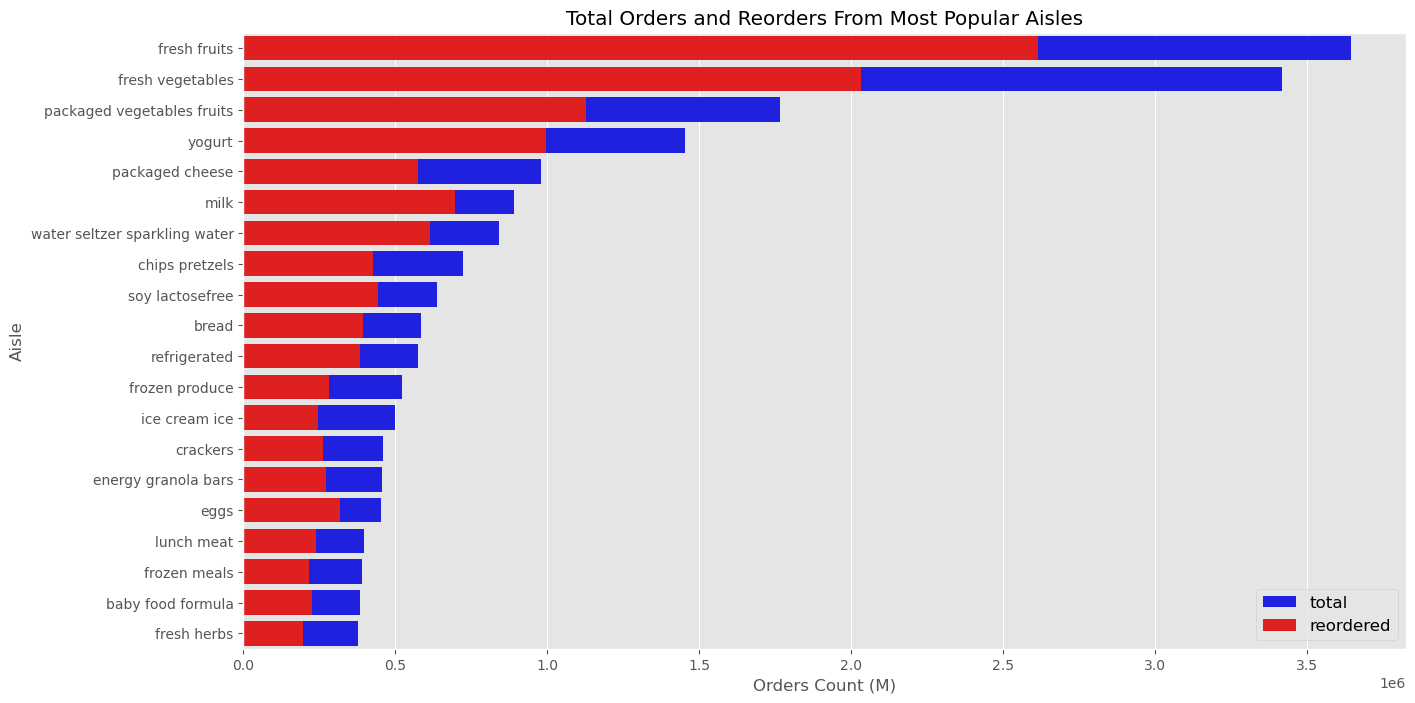

In [72]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color='blue', label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color='red', label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count (M)")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [73]:
dept_df = orders_final.groupby('department')['reordered'].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
dept_df = dept_df.sort_values('total', ascending=False).reset_index()

In [74]:
dept_df['reorder_ratio'] = dept_df['reorders']/dept_df['total']

In [75]:
dept_df.head()

,department,total,reorders,reorder_ratio
0,produce,9479291,6160710,0.649913
1,dairy eggs,5414016,3627221,0.669969
2,snacks,2887550,1657973,0.574180
3,beverages,2690129,1757892,0.653460
4,frozen,2236432,1211890,0.541885


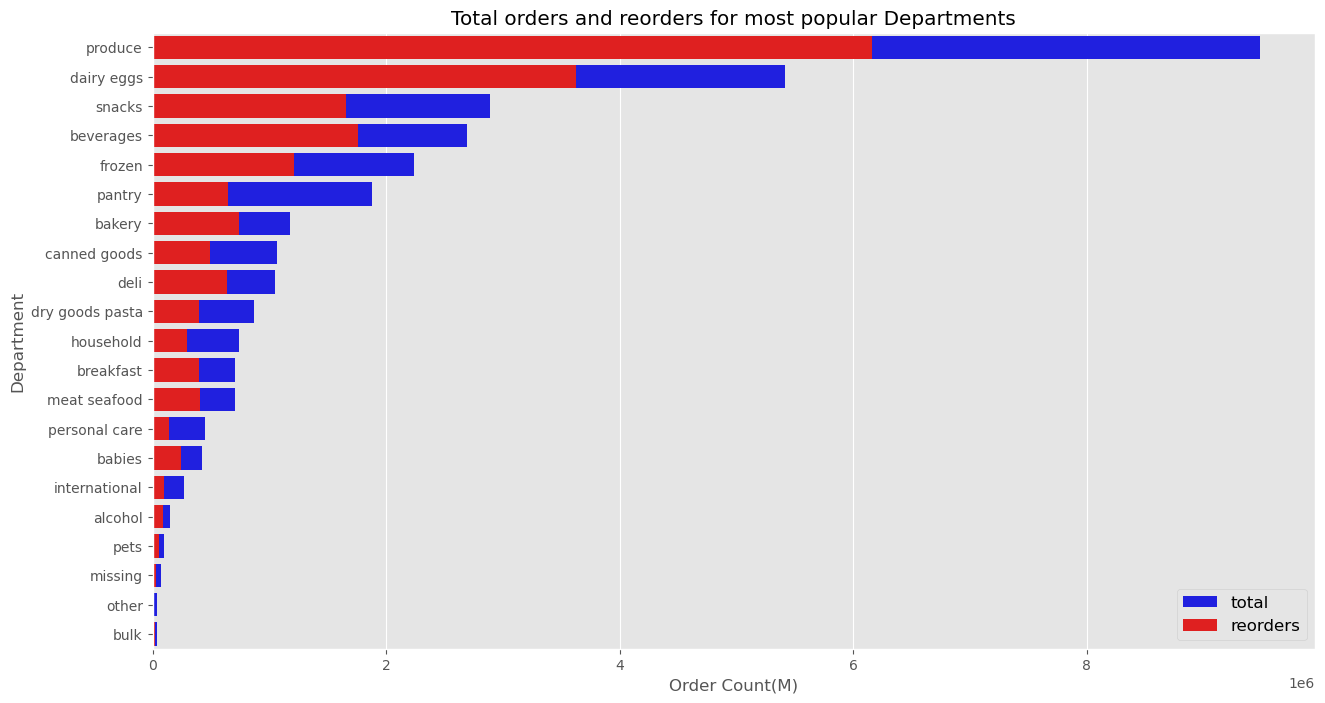

In [76]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot( y= dept_df.department, x = dept_df.total, color = 'blue', label = 'total')
ax = sns.barplot ( y = dept_df.department, x = dept_df.reorders, color = 'red', label = 'reorders')
ax.set_ylabel('Department')
ax.set_xlabel('Order Count(M)')
ax.set_title('Total orders and reorders for most popular Departments')
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [77]:
prod_df = orders_final.groupby('product_name')['reordered'].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
prod_df = prod_df.sort_values('total', ascending=False).reset_index()
prod_df.head()

,product_name,total,reorders
0,Banana,472565,398609
1,Bag of Organic Bananas,379450,315913
2,Organic Strawberries,264683,205845
3,Organic Baby Spinach,241921,186884
4,Organic Hass Avocado,213584,170131


In [78]:
prod_df['ratio'] = prod_df['reorders']/prod_df['total'].round(2)

In [79]:
prod_df['ratio'] = prod_df['ratio'].round(2)

In [80]:
prod_df = prod_df.sort_values([ 'total' , 'ratio'], ascending=False).reset_index()

In [81]:
prod_df = prod_df.head(20)

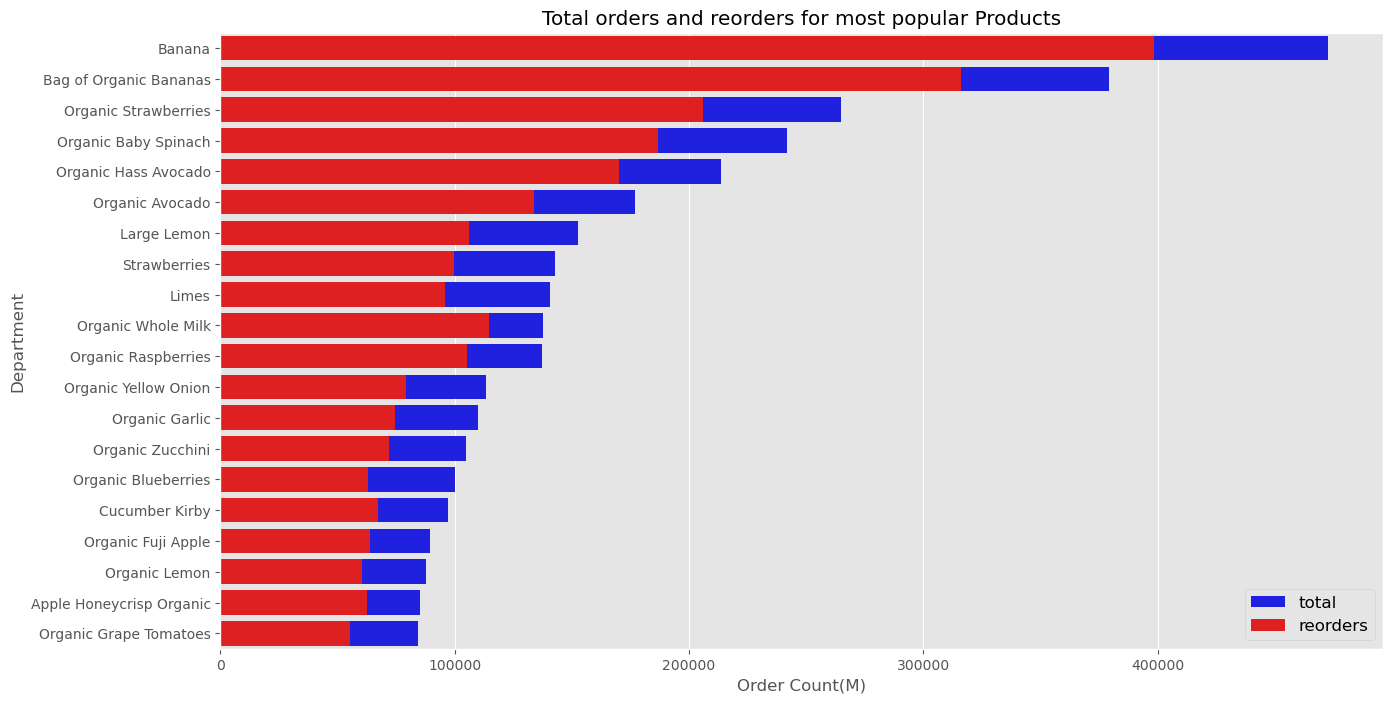

In [82]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot( y= prod_df.product_name, x = prod_df.total, color = 'blue', label = 'total')
ax = sns.barplot ( y = prod_df.product_name, x = prod_df.reorders, color = 'red', label = 'reorders')
ax.set_ylabel('Department')
ax.set_xlabel('Order Count(M)')
ax.set_title('Total orders and reorders for most popular Products')
ax.legend(loc = 4, prop={'size': 12})
plt.show()